In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mehranehmgh","key":"c2c1365e6432393d8c5dfbe309c0236c"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 31.9MB/s]


In [5]:
!unzip '/content/mobile-price-classification.zip' -d '/content/'

Archive:  /content/mobile-price-classification.zip
  inflating: /content/test.csv       
  inflating: /content/train.csv      


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report

In [44]:
import pandas as pd

df_train = pd.read_csv('/content/train.csv')
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## **Some Visualization**

In [33]:
import plotly.express as px
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt

In [11]:
count = df_train.price_range.value_counts()
category = count.index

In [12]:
category

Int64Index([1, 2, 3, 0], dtype='int64')

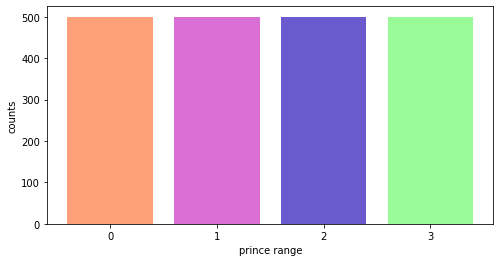

In [13]:
plt.figure(figsize=(8,4))
plt.bar(category,count, color=['orchid', 'slateblue', 'palegreen', 'lightsalmon']) 
plt.xlabel('prince range')
plt.ylabel('counts')
plt.xticks([0, 1, 2, 3])
plt.show()

In [14]:
wifi_val = df_train.wifi.value_counts()
wifi_val

1    1014
0     986
Name: wifi, dtype: int64

<Figure size 720x432 with 0 Axes>

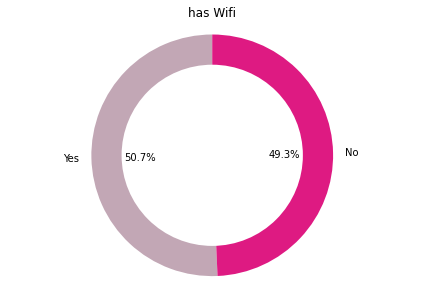

In [15]:
plt.figure(figsize=(10,6))
colors=['#C2A7B5','#DE1A82']
fig1, ax1 = plt.subplots()
ax1.pie(x = wifi_val, colors = colors, labels=['Yes','No'], autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("has Wifi")
plt.show()

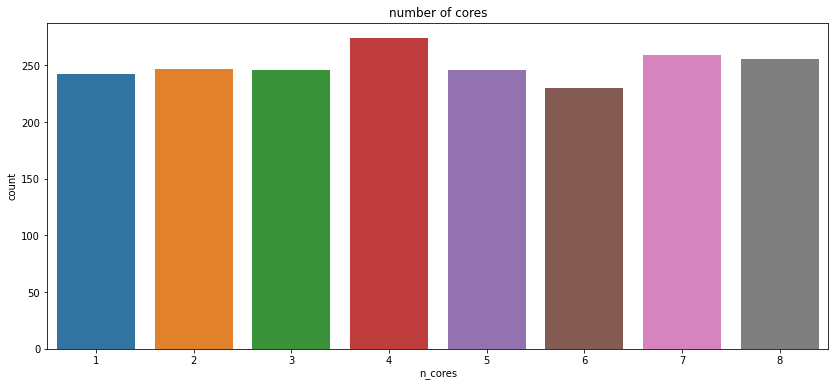

In [16]:
plt.figure(figsize=(14,6))
sb.countplot(x = "n_cores",data=df_train)
plt.title("number of cores")
plt.show()

In [18]:
blue_val = df_train.blue.value_counts()
blue_val

0    1010
1     990
Name: blue, dtype: int64

<Figure size 720x432 with 0 Axes>

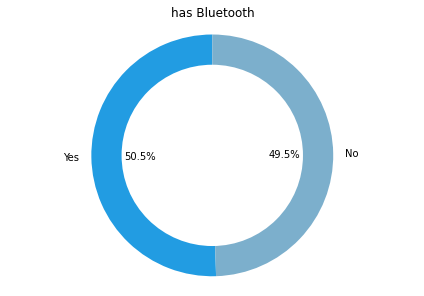

In [19]:
plt.figure(figsize=(10,6))
colors=['#229CE2','#7CAFCC']
fig1, ax1 = plt.subplots()
ax1.pie(x= blue_val, colors = colors, labels=['Yes','No'], autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("has Bluetooth")
plt.show()

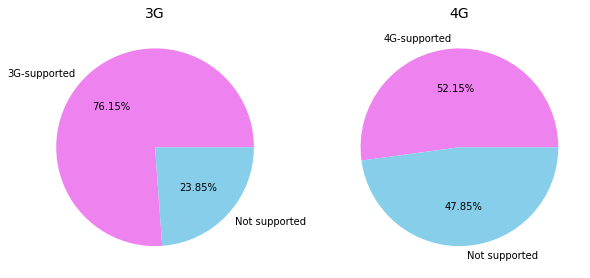

In [20]:
val_3g = df_train["three_g"].value_counts()
val_4g = df_train["four_g"].value_counts()

colors = ["violet", "skyblue"]

fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(x= val_3g, autopct="%.2f%%",
        labels=["3G-supported",'Not supported'], pctdistance=0.6,
        colors = colors)
plt.title('3G', size = 14)

ax1 = plt.subplot2grid((2,2), (0, 1))
plt.pie(x =val_4g,autopct="%.2f%%", 
        labels=["4G-supported",'Not supported'], pctdistance=0.6, 
        colors = colors)
plt.title('4G', size = 14)
plt.show()

In [21]:
range_mapping = {0: "cheap",
    1: "standart",
    2: "expensive",
    3: "very expensive"}

In [22]:
df_train['price_range_mapped'] = df_train['price_range'].map(range_mapping)

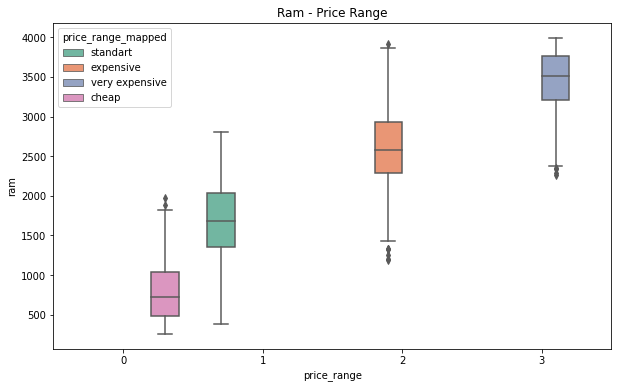

In [23]:
plt.figure(figsize=(10,6))
sb.boxplot(x='price_range', y='ram', data=df_train, palette="Set2", hue='price_range_mapped')
plt.title("Ram - Price Range")
plt.show()

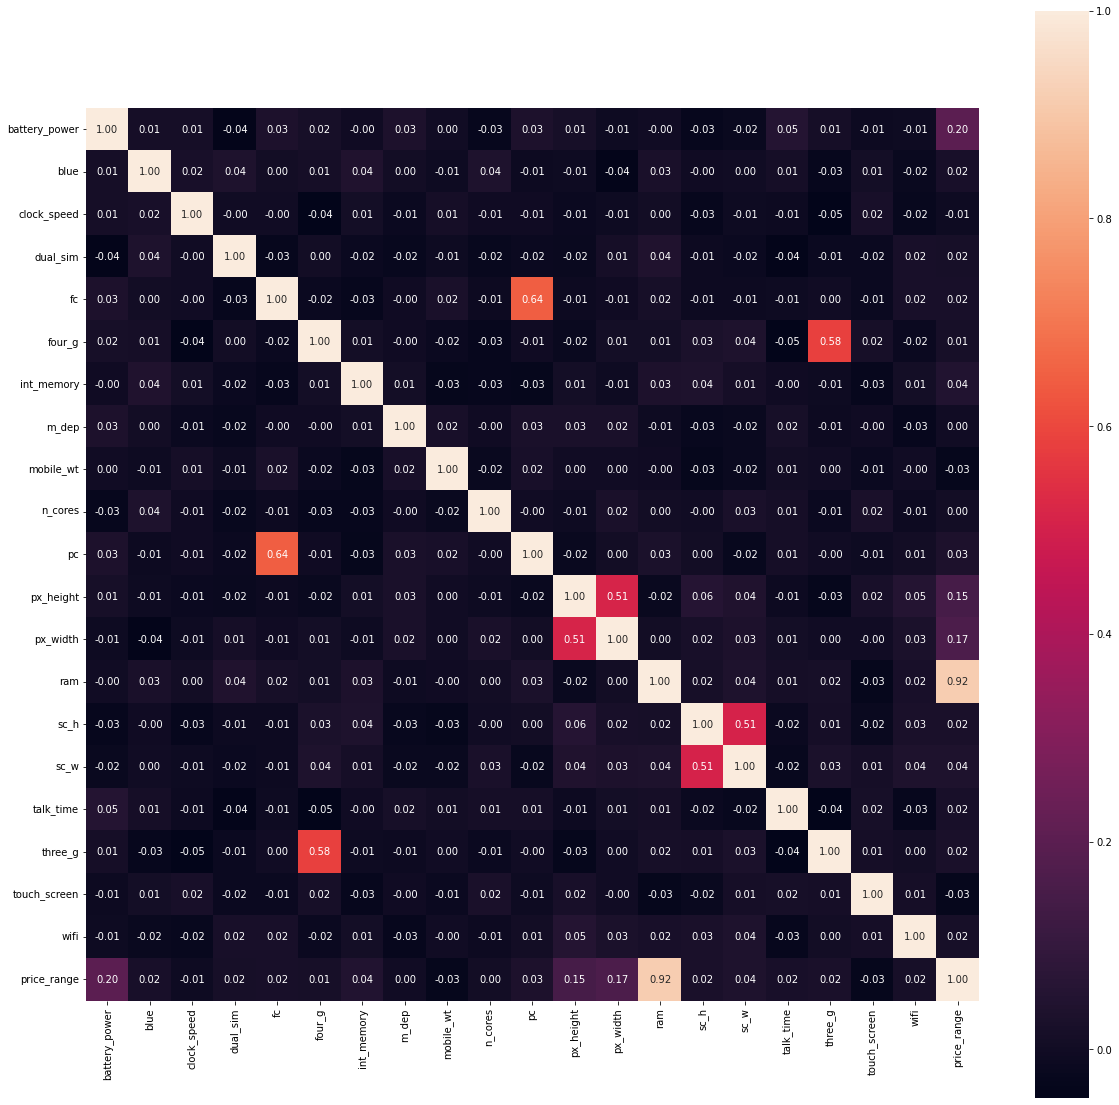

In [24]:
corr=df_train.corr()
f, ax = plt.subplots(figsize=(20, 20))
sb.heatmap(corr, square = True,fmt='.2f' ,annot = True)

In [29]:
df_train['price_range'].unique()

array([1, 2, 3, 0])

# **Feature Selection (Forward)**

In [45]:
df_train['price_range'].unique()

array([1, 2, 3, 0])

In [46]:
di = {1:0 , 2:1, 3:1}
df_train = df_train.replace({"price_range": di})

In [47]:
df_train['price_range'].unique()

array([0, 1])

In [48]:
from sklearn.metrics import auc

def forward_selection(X, y):
  features = []
  final_features = {'features': [], 'scores': []}
  rem_features = X.columns
  for i in range(len(X.columns)):
    max_score = 0
    best_feature = ""
    best_score = 0
    for feature in rem_features:
      new_X = X[features + [feature]]
      x_train, x_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=0)
      lr = LogisticRegression()
      lr.fit(x_train, y_train)
      score = lr.score(x_test, y_test)
      if score > max_score :
        max_score = score
        best_feature = feature
        best_score = score
    rem_features = rem_features.drop(best_feature)
    features.append(best_feature)

    final_features['features'].append(best_feature)
    final_features['scores'].append(best_score)
    final_features['features_rank'] = range(len(X.columns))

  best_index = 0
  mx_feature = 0
  for i in range(len(final_features['scores'])):
    if final_features['scores'][i] > mx_feature:
      mx_feature = final_features['scores'][i] 
      best_index = i

  final_features['best_features'] = final_features['features'][:best_index]
  return final_features


In [49]:
from sklearn.preprocessing import StandardScaler

X = df_train.drop(['price_range'], axis=1)
y = df_train['price_range']

sc = StandardScaler()
X[X.columns] = sc.fit_transform(X[X.columns])

In [50]:
fs = forward_selection(X, y)

In [51]:
fs

{'best_features': ['ram', 'px_height', 'battery_power', 'px_width'],
 'features': ['ram',
  'px_height',
  'battery_power',
  'px_width',
  'mobile_wt',
  'dual_sim',
  'fc',
  'wifi',
  'four_g',
  'sc_h',
  'n_cores',
  'blue',
  'clock_speed',
  'sc_w',
  'three_g',
  'pc',
  'int_memory',
  'm_dep',
  'talk_time',
  'touch_screen'],
 'features_rank': range(0, 20),
 'scores': [0.92,
  0.9375,
  0.9675,
  0.99,
  0.9925,
  0.9925,
  0.9925,
  0.9925,
  0.9925,
  0.9925,
  0.9925,
  0.9925,
  0.9925,
  0.9925,
  0.9925,
  0.99,
  0.99,
  0.99,
  0.985,
  0.985]}

In [52]:
best_features = fs['best_features']
best_features

['ram', 'px_height', 'battery_power', 'px_width']

In [53]:
X = X[best_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
logisticReg = LogisticRegression()
logisticReg.fit(X_train,y_train)

LogisticRegression()

In [55]:
y_pred = logisticReg.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test, y_pred))

confussion matrix
[[186   1]
 [  3 210]]
-------------------------------------------
Accuracy of Logistic Regression: 99.0 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       187
           1       1.00      0.99      0.99       213

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



# **Working with PCA**

In [56]:
from sklearn.model_selection import train_test_split


features = df_train.drop(columns=['price_range'])
target = df_train['price_range']

x=features.values
y=target.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [57]:
x

array([[8.420e+02, 0.000e+00, 2.200e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 9.000e-01, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 2.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [58]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
x_pca = pca.fit_transform(x)
principalDf = pd.DataFrame(data = x_pca
             , columns = ['principal component 1', 'principal component 2',
                          'principal component 3', 'principal component 4'])
#x_pca.shape
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4
0,430.597094,-795.788231,-390.070331,55.636140
1,504.984735,696.622368,-235.629081,343.925977
2,473.329828,763.942136,-680.059466,-113.916880
3,639.822324,779.691180,-630.783647,-30.402246
4,-718.985184,382.304525,591.040362,-392.357235
...,...,...,...,...
1995,-1461.096167,843.813138,-456.014439,62.281534
1996,-94.445767,693.937805,708.385209,354.827455
1997,930.669266,436.671452,664.296211,136.527432
1998,-1252.737615,-629.884112,285.786392,-190.422713


In [59]:
finalDf = pd.concat([principalDf, df_train[['price_range']]], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,price_range
0,430.597094,-795.788231,-390.070331,55.636140,0
1,504.984735,696.622368,-235.629081,343.925977,1
2,473.329828,763.942136,-680.059466,-113.916880,1
3,639.822324,779.691180,-630.783647,-30.402246,1
4,-718.985184,382.304525,591.040362,-392.357235,0
...,...,...,...,...,...
1995,-1461.096167,843.813138,-456.014439,62.281534,0
1996,-94.445767,693.937805,708.385209,354.827455,1
1997,930.669266,436.671452,664.296211,136.527432,1
1998,-1252.737615,-629.884112,285.786392,-190.422713,0


In [60]:
x_pca_train , x_pca_test = train_test_split(x_pca , test_size = 0.2, random_state = 42)

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_pca_train = sc.fit_transform(x_pca_train)
x_pca_test = sc.transform(x_pca_test)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report

In [63]:
new_lr = LogisticRegression()
new_lr.fit(x_pca_train,y_train)

LogisticRegression()

In [64]:
pca_pred = new_lr.predict(x_pca_test)

lr_conf_matrix = confusion_matrix(y_test, pca_pred)
lr_acc_score = accuracy_score(y_test, pca_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test, pca_pred))

confussion matrix
[[196   0]
 [  3 201]]
-------------------------------------------
Accuracy of Logistic Regression: 99.25 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       196
           1       1.00      0.99      0.99       204

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



# SVM

In [47]:
df_train = pd.read_csv('/content/train.csv')
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [48]:
features = df_train.drop(columns=['price_range'])
target = df_train['price_range']

x=features.values
y=target.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [49]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [50]:
from sklearn.svm import SVC

In [51]:
SVM = SVC()
SVM.fit(x_train , y_train)
SVM.score(x_test, y_test)*100

89.25

In [52]:
SVM = SVC(kernel='precomputed')
SVM.fit(x_train , y_train)
SVM.score(x_test, y_test)*100

ValueError: ignored

In [53]:
SVM = SVC(kernel='linear')
SVM.fit(x_train , y_train)
SVM.score(x_test, y_test)*100

97.0

In [54]:
SVM = SVC(kernel='sigmoid')
SVM.fit(x_train , y_train)
SVM.score(x_test, y_test)*100

92.0

In [55]:
SVM = SVC(kernel='sigmoid' , decision_function_shape='ovo')
SVM.fit(x_train , y_train)
SVM.score(x_test, y_test)*100

92.0

In [56]:
SVM = SVC(kernel='poly')
SVM.fit(x_train , y_train)
SVM.score(x_test, y_test)*100

78.75

# **Feature Engineering**

## **Binning**

In [58]:
df_train['battery_power'][1]

1021

In [59]:
#4bins equal_size

min = min(df_train['battery_power'])
max = max(df_train['battery_power'])

In [60]:
i = (max - min) / 4
bin = [min-1 , min + i , min + 2*i , min + 3*i , max+1]

In [61]:
s1 , s2 , s3 , s4 , count1 , count2 , count3 , count4 = 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0
for j in range (2000):
  if (bin[0] <= df_train['battery_power'][j] <bin[1]):
    s1 = s1 + df_train['battery_power'][j]
    count1 = count1 + 1
  elif (bin[1] <= df_train['battery_power'][j] < bin[2]):
    s2 = s2 + df_train['battery_power'][j]
    count2 = count2 + 1
  elif (bin[2] <= df_train['battery_power'][j] < bin[3]):
    s3 = s3 + df_train['battery_power'][j]
    count3 = count3 + 1
  elif (bin[3] <= df_train['battery_power'][j] < bin[4]):
    s4 = s4 + df_train['battery_power'][j]
    count4 = count4 + 1

In [62]:
av = [(s1 / count1) , (s2 / count2) , (s3 / count3) , (s4 / count4)]
av

[686.4525139664804, 1061.7685950413222, 1440.756646216769, 1816.2979591836734]

In [63]:
df_bin = df_train
df_bin['average_battery'] = pd.cut(df_bin['battery_power'] , bin ,labels = av)
df_bin.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,average_battery
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,686.452514
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1061.768595
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,686.452514
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,686.452514
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,1816.297959


In [64]:
df_bin = df_bin.drop(['price_range','battery_power'], axis=1, inplace=False)
x_train, x_test, y_train, y_test = train_test_split(df_bin, y, test_size = 0.2, random_state =42)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [65]:
SVM = SVC()
SVM.fit(x_train , y_train)
SVM.score(x_test, y_test)*100

86.0

In [66]:
#6bins equal_size

i = (max - min) / 6
bin = [min-1 , min + i , min + 2*i , min + 3*i ,min + 4*i , min + 5*i , max+1]

In [67]:
s1 , s2 , s3 , s4 , s5, s6, count1 , count2 , count3 , count4, count5, count6 = 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0, 0, 0, 0, 0
for j in range (2000):
  if (bin[0] <= df_train['battery_power'][j] <bin[1]):
    s1 = s1 + df_train['battery_power'][j]
    count1 = count1 + 1
  elif (bin[1] <= df_train['battery_power'][j] < bin[2]):
    s2 = s2 + df_train['battery_power'][j]
    count2 = count2 + 1
  elif (bin[2] <= df_train['battery_power'][j] < bin[3]):
    s3 = s3 + df_train['battery_power'][j]
    count3 = count3 + 1
  elif (bin[3] <= df_train['battery_power'][j] < bin[4]):
    s4 = s4 + df_train['battery_power'][j]
    count4 = count4 + 1
  elif (bin[4] <= df_train['battery_power'][j] < bin[5]):
    s5 = s5 + df_train['battery_power'][j]
    count5 = count5 + 1
  elif (bin[5] <= df_train['battery_power'][j] < bin[6]):
    s6 = s6 + df_train['battery_power'][j]
    count6 = count6 + 1

In [68]:
av_6 = [(s1 / count1) , (s2 / count2) , (s3 / count3) , (s4 / count4), (s5 / count5), (s6 / count6)]
av_6

[622.2200557103064,
 873.0982142857143,
 1122.0337423312883,
 1374.7034700315457,
 1623.4066265060242,
 1878.0727272727272]

In [69]:
df_bin2 = df_train
df_bin2['average_battery'] = pd.cut(df_bin2['battery_power'] , bin ,labels = av_6)
df_bin2.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,average_battery
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,873.098214
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,1122.033742
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,622.220056
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,622.220056
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,1878.072727


In [70]:
df_bin2 = df_bin2.drop(['price_range','battery_power'], axis=1, inplace=False)
x_train, x_test, y_train, y_test = train_test_split(df_bin2, y, test_size = 0.2, random_state =42)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [71]:
SVM = SVC()
SVM.fit(x_train , y_train)
SVM.score(x_test, y_test)*100

89.5

In [72]:
#8bins equal_size

i = (max - min) / 8
bin = [min-1 , min + i , min + 2*i , min + 3*i ,min + 4*i , min + 5*i , min + 6*i, min + 7*i ,max+1]

In [73]:
s1 , s2 , s3 , s4 , s5, s6, s7, s8, count1 , count2 , count3 , count4, count5, count6, count7, count8 = 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0, 0, 0, 0, 0, 0, 0, 0, 0
for j in range (2000):
  if (bin[0] <= df_train['battery_power'][j] <bin[1]):
    s1 = s1 + df_train['battery_power'][j]
    count1 = count1 + 1
  elif (bin[1] <= df_train['battery_power'][j] < bin[2]):
    s2 = s2 + df_train['battery_power'][j]
    count2 = count2 + 1
  elif (bin[2] <= df_train['battery_power'][j] < bin[3]):
    s3 = s3 + df_train['battery_power'][j]
    count3 = count3 + 1
  elif (bin[3] <= df_train['battery_power'][j] < bin[4]):
    s4 = s4 + df_train['battery_power'][j]
    count4 = count4 + 1
  elif (bin[4] <= df_train['battery_power'][j] < bin[5]):
    s5 = s5 + df_train['battery_power'][j]
    count5 = count5 + 1
  elif (bin[5] <= df_train['battery_power'][j] < bin[6]):
    s6 = s6 + df_train['battery_power'][j]
    count6 = count6 + 1
  elif (bin[6] <= df_train['battery_power'][j] < bin[7]):
    s7 = s7 + df_train['battery_power'][j]
    count7 = count5 + 1
  elif (bin[7] <= df_train['battery_power'][j] < bin[8]):
    s8 = s8 + df_train['battery_power'][j]
    count8 = count8 + 1

In [74]:
av_8 = [(s1 / count1) , (s2 / count2) , (s3 / count3) , (s4 / count4), (s5 / count5), (s6 / count6), (s7 / count7), (s8 / count8)]
av_8

[593.5379061371841,
 785.4423076923077,
 967.9702127659574,
 1150.293172690763,
 1341.6923076923076,
 1531.6627450980393,
 1733.094017094017,
 1907.251968503937]

In [75]:
df_bin3 = df_train
df_bin3['average_battery'] = pd.cut(df_bin3['battery_power'] , bin ,labels = av_8)
df_bin3.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,average_battery
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,785.442308
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,967.970213
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,593.537906
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,593.537906
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,1907.251969


In [76]:
df_bin3 = df_bin3.drop(['price_range','battery_power'], axis=1, inplace=False)
x_train, x_test, y_train, y_test = train_test_split(df_bin3, y, test_size = 0.2, random_state =42)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [77]:
SVM = SVC()
SVM.fit(x_train , y_train)
SVM.score(x_test, y_test)*100

89.0

In [78]:
#6bins not_equal_size

i = (max - min) / 6
bin = [min-1 , min + i + 100 , min + 2*i+50 , min + 3*i+200 ,min + 4*i , min + 5*i-100 , max+1]
bin

[500, 850.5, 1050.0, 1449.5, 1499.0, 1648.5, 1999]

In [79]:
s1 , s2 , s3 , s4 , s5, s6, count1 , count2 , count3 , count4, count5, count6 = 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0, 0, 0, 0, 0
for j in range (2000):
  if (bin[0] <= df_train['battery_power'][j] <bin[1]):
    s1 = s1 + df_train['battery_power'][j]
    count1 = count1 + 1
  elif (bin[1] <= df_train['battery_power'][j] < bin[2]):
    s2 = s2 + df_train['battery_power'][j]
    count2 = count2 + 1
  elif (bin[2] <= df_train['battery_power'][j] < bin[3]):
    s3 = s3 + df_train['battery_power'][j]
    count3 = count3 + 1
  elif (bin[3] <= df_train['battery_power'][j] < bin[4]):
    s4 = s4 + df_train['battery_power'][j]
    count4 = count4 + 1
  elif (bin[4] <= df_train['battery_power'][j] < bin[5]):
    s5 = s5 + df_train['battery_power'][j]
    count5 = count5 + 1
  elif (bin[5] <= df_train['battery_power'][j] < bin[6]):
    s6 = s6 + df_train['battery_power'][j]
    count6 = count6 + 1

In [80]:
nequal_av = [(s1 / count1) , (s2 / count2) , (s3 / count3) , (s4 / count4), (s5 / count5), (s6 / count6)]
nequal_av

[672.6606425702811,
 946.926640926641,
 1246.173076923077,
 1476.27868852459,
 1572.2121212121212,
 1826.3728448275863]

In [81]:
df_bin4 = df_train
df_bin4['average_battery'] = pd.cut(df_bin4['battery_power'] , bin ,labels = nequal_av)
df_bin4.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,average_battery
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,672.660643
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,946.926641
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1716,2603,11,2,9,1,1,0,2,672.660643
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1786,2769,16,8,11,1,0,0,2,672.660643
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1212,1411,8,2,15,1,1,0,1,1826.372845


In [82]:
df_bin4 = df_bin4.drop(['price_range','battery_power'], axis=1, inplace=False)
x_train, x_test, y_train, y_test = train_test_split(df_bin4, y, test_size = 0.2, random_state =42)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [85]:
SVM = SVC()
SVM.fit(x_train , y_train)
SVM.score(x_test, y_test)*100

88.25

## **Log Transform**

In [86]:
df_train = pd.read_csv('/content/train.csv')
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [87]:
features = df_train.drop(columns=['price_range'])
features

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [88]:
import numpy as np
df_train_log1 = (features+1).transform(np.log)
#Negative Values Handling
#Note that the values are different
df_train_log = (features - features.min()+1).transform(np.log)
#df_train_log1
df_train_log

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,5.834811,0.000000,0.993252,0.000000,0.693147,0.000000,1.791759,0.405465,4.691348,0.693147,1.098612,3.044522,5.549076,7.738052,1.609438,2.079442,2.890372,0.000000,0.000000,0.693147
1,6.255750,0.693147,0.000000,0.693147,0.000000,0.693147,3.951244,0.470004,4.043051,1.098612,1.945910,6.809039,7.305860,7.773174,2.564949,1.386294,1.791759,0.693147,0.693147,0.000000
2,4.143135,0.693147,0.000000,0.693147,1.098612,0.693147,3.688879,0.587787,4.189655,1.609438,1.945910,7.142037,7.104144,7.761319,1.945910,1.098612,2.079442,0.693147,0.693147,0.000000
3,4.744932,0.693147,1.098612,0.000000,0.000000,0.000000,2.197225,0.530628,3.951244,1.791759,2.302585,7.104144,7.160069,7.829630,2.484907,2.197225,2.302585,0.693147,0.000000,0.000000
4,7.186144,0.693147,0.530628,0.000000,2.639057,0.693147,3.761200,0.405465,4.127134,0.693147,2.708050,7.097549,6.569481,7.052721,1.386294,1.098612,2.639057,0.693147,0.693147,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,5.683580,0.693147,0.000000,0.693147,0.000000,0.693147,0.000000,0.530628,3.295837,1.791759,2.708050,7.109062,7.237778,6.023448,2.197225,1.609438,2.890372,0.693147,0.693147,0.000000
1996,7.289611,0.693147,1.131402,0.693147,0.000000,0.000000,3.637586,0.095310,4.682131,1.386294,1.386294,6.820016,7.290293,7.482682,1.945910,2.397895,2.708050,0.693147,0.693147,0.693147
1997,7.252054,0.000000,0.336472,0.693147,0.693147,0.693147,3.555348,0.470004,3.367296,2.079442,1.386294,6.767343,7.032624,7.938089,1.609438,0.693147,1.386294,0.693147,0.693147,0.000000
1998,6.919684,0.000000,0.336472,0.000000,1.609438,0.693147,3.806662,0.000000,4.189655,1.609438,1.791759,5.820083,5.141664,6.419995,2.639057,2.397895,2.890372,0.693147,0.693147,0.693147


In [89]:
from sklearn.model_selection import train_test_split

log_features = df_train_log
target = df_train['price_range']

x=log_features.values
y=target.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [90]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [91]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(x_train , y_train)
SVM.score(x_test, y_test)*100

77.0

## **Adding New Feature**

In [92]:
df_train = pd.read_csv('/content/train.csv')
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [93]:
V = (df_train["px_height"]) *(df_train["px_width"] * df_train['m_dep'])
train_V = df_train.drop(["px_height","px_width","price_range" , "m_dep"], axis=1, inplace=False)
train_V['V'] = V
train_V

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,V
0,842,0,2.2,0,1,0,7,188,2,2,2549,9,7,19,0,0,1,9072.0
1,1021,1,0.5,1,0,1,53,136,3,6,2631,17,3,7,1,1,0,1259398.0
2,563,1,0.5,1,2,1,41,145,5,6,2603,11,2,9,1,1,0,1950577.2
3,615,1,2.5,0,0,0,10,131,6,9,2769,16,8,11,1,0,0,1737420.8
4,1821,1,1.2,0,13,1,44,141,2,14,1411,8,2,15,1,1,0,878457.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,106,6,14,668,13,4,19,1,1,0,1847664.0
1996,1965,1,2.6,1,0,0,39,187,4,3,2032,11,10,16,1,1,1,359595.0
1997,1911,0,0.9,1,1,1,36,108,8,3,3057,9,1,5,1,1,0,991603.2
1998,1512,0,0.9,0,4,1,46,145,5,5,869,18,10,19,1,1,1,22512.0


In [94]:
x_train, x_test, y_train, y_test = train_test_split(train_V, y, test_size = 0.2, random_state =42)
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [95]:
SVM = SVC()
SVM.fit(x_train , y_train)
SVM.score(x_test, y_test)*100

83.25

## **All changes together**

In [96]:
bin_train = df_train
bin_train['average_battery'] = pd.cut(bin_train['battery_power'] , bin ,labels = av_6)

new_df = bin_train.drop(["px_height","px_width","price_range" ,"m_dep", "battery_power"], axis=1, inplace=False)
new_df['V'] = V
new_df.head()

,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,average_battery,V
0,0,2.2,0,1,0,7,188,2,2,2549,9,7,19,0,0,1,622.220056,9072.0
1,1,0.5,1,0,1,53,136,3,6,2631,17,3,7,1,1,0,873.098214,1259398.0
2,1,0.5,1,2,1,41,145,5,6,2603,11,2,9,1,1,0,622.220056,1950577.2
3,1,2.5,0,0,0,10,131,6,9,2769,16,8,11,1,0,0,622.220056,1737420.8
4,1,1.2,0,13,1,44,141,2,14,1411,8,2,15,1,1,0,1878.072727,878457.6


In [97]:
new_df

,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,average_battery,V
0,0,2.2,0,1,0,7,188,2,2,2549,9,7,19,0,0,1,622.220056,9072.0
1,1,0.5,1,0,1,53,136,3,6,2631,17,3,7,1,1,0,873.098214,1259398.0
2,1,0.5,1,2,1,41,145,5,6,2603,11,2,9,1,1,0,622.220056,1950577.2
3,1,2.5,0,0,0,10,131,6,9,2769,16,8,11,1,0,0,622.220056,1737420.8
4,1,1.2,0,13,1,44,141,2,14,1411,8,2,15,1,1,0,1878.072727,878457.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0.5,1,0,1,2,106,6,14,668,13,4,19,1,1,0,622.220056,1847664.0
1996,1,2.6,1,0,0,39,187,4,3,2032,11,10,16,1,1,1,1878.072727,359595.0
1997,0,0.9,1,1,1,36,108,8,3,3057,9,1,5,1,1,0,1878.072727,991603.2
1998,0,0.9,0,4,1,46,145,5,5,869,18,10,19,1,1,1,1623.406627,22512.0


In [98]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   blue             2000 non-null   int64   
 1   clock_speed      2000 non-null   float64 
 2   dual_sim         2000 non-null   int64   
 3   fc               2000 non-null   int64   
 4   four_g           2000 non-null   int64   
 5   int_memory       2000 non-null   int64   
 6   mobile_wt        2000 non-null   int64   
 7   n_cores          2000 non-null   int64   
 8   pc               2000 non-null   int64   
 9   ram              2000 non-null   int64   
 10  sc_h             2000 non-null   int64   
 11  sc_w             2000 non-null   int64   
 12  talk_time        2000 non-null   int64   
 13  three_g          2000 non-null   int64   
 14  touch_screen     2000 non-null   int64   
 15  wifi             2000 non-null   int64   
 16  average_battery  2000 non-null   category


In [99]:
new_df['avrg_battery'] = pd.to_numeric(new_df['average_battery'])
new_df.drop(['average_battery'], axis=1, inplace=True)

In [100]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   blue          2000 non-null   int64  
 1   clock_speed   2000 non-null   float64
 2   dual_sim      2000 non-null   int64  
 3   fc            2000 non-null   int64  
 4   four_g        2000 non-null   int64  
 5   int_memory    2000 non-null   int64  
 6   mobile_wt     2000 non-null   int64  
 7   n_cores       2000 non-null   int64  
 8   pc            2000 non-null   int64  
 9   ram           2000 non-null   int64  
 10  sc_h          2000 non-null   int64  
 11  sc_w          2000 non-null   int64  
 12  talk_time     2000 non-null   int64  
 13  three_g       2000 non-null   int64  
 14  touch_screen  2000 non-null   int64  
 15  wifi          2000 non-null   int64  
 16  V             2000 non-null   float64
 17  avrg_battery  2000 non-null   float64
dtypes: float64(3), int64(15)
mem

In [101]:
new_df_log = (new_df - new_df.min() + 1).transform(np.log)
#df_train_log1
new_df_log

,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,V,avrg_battery
0,0.000000,0.993252,0.000000,0.693147,0.000000,1.791759,4.691348,0.693147,1.098612,7.738052,1.609438,2.079442,2.890372,0.000000,0.000000,0.693147,9.113058,0.000000
1,0.693147,0.000000,0.693147,0.000000,0.693147,3.951244,4.043051,1.098612,1.945910,7.773174,2.564949,1.386294,1.791759,0.693147,0.693147,0.000000,14.046145,5.528945
2,0.693147,0.000000,0.693147,1.098612,0.693147,3.688879,4.189655,1.609438,1.945910,7.761319,1.945910,1.098612,2.079442,0.693147,0.693147,0.000000,14.483636,0.000000
3,0.693147,1.098612,0.000000,0.000000,0.000000,2.197225,3.951244,1.791759,2.302585,7.829630,2.484907,2.197225,2.302585,0.693147,0.000000,0.000000,14.367913,0.000000
4,0.693147,0.530628,0.000000,2.639057,0.693147,3.761200,4.127134,0.693147,2.708050,7.052721,1.386294,1.098612,2.639057,0.693147,0.693147,0.000000,13.685924,7.136366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.693147,0.000000,0.693147,0.000000,0.693147,0.000000,3.295837,1.791759,2.708050,6.023448,2.197225,1.609438,2.890372,0.693147,0.693147,0.000000,14.429433,0.000000
1996,0.693147,1.131402,0.693147,0.000000,0.000000,3.637586,4.682131,1.386294,1.386294,7.482682,1.945910,2.397895,2.708050,0.693147,0.693147,0.693147,12.792736,7.136366
1997,0.000000,0.336472,0.693147,0.693147,0.693147,3.555348,3.367296,2.079442,1.386294,7.938089,1.609438,0.693147,1.386294,0.693147,0.693147,0.000000,13.807079,7.136366
1998,0.000000,0.336472,0.000000,1.609438,0.693147,3.806662,4.189655,1.609438,1.791759,6.419995,2.639057,2.397895,2.890372,0.693147,0.693147,0.693147,10.021848,6.909939


In [102]:
features_log = new_df_log
target = df_train['price_range']

x=features_log.values
y=target.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [103]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [104]:
SVM = SVC()
SVM.fit(x_train , y_train)
SVM.score(x_test, y_test)*100

75.5

# **Decision Tree**

In [105]:
df_train = pd.read_csv('/content/train.csv')
df_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [106]:
from sklearn.model_selection import train_test_split

features = df_train.drop(columns=['price_range'])
target = df_train['price_range']

x=features.values
y=target.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =42)

In [107]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [108]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train,y_train)
print(dt.score(x_test,y_test)*100)

83.5


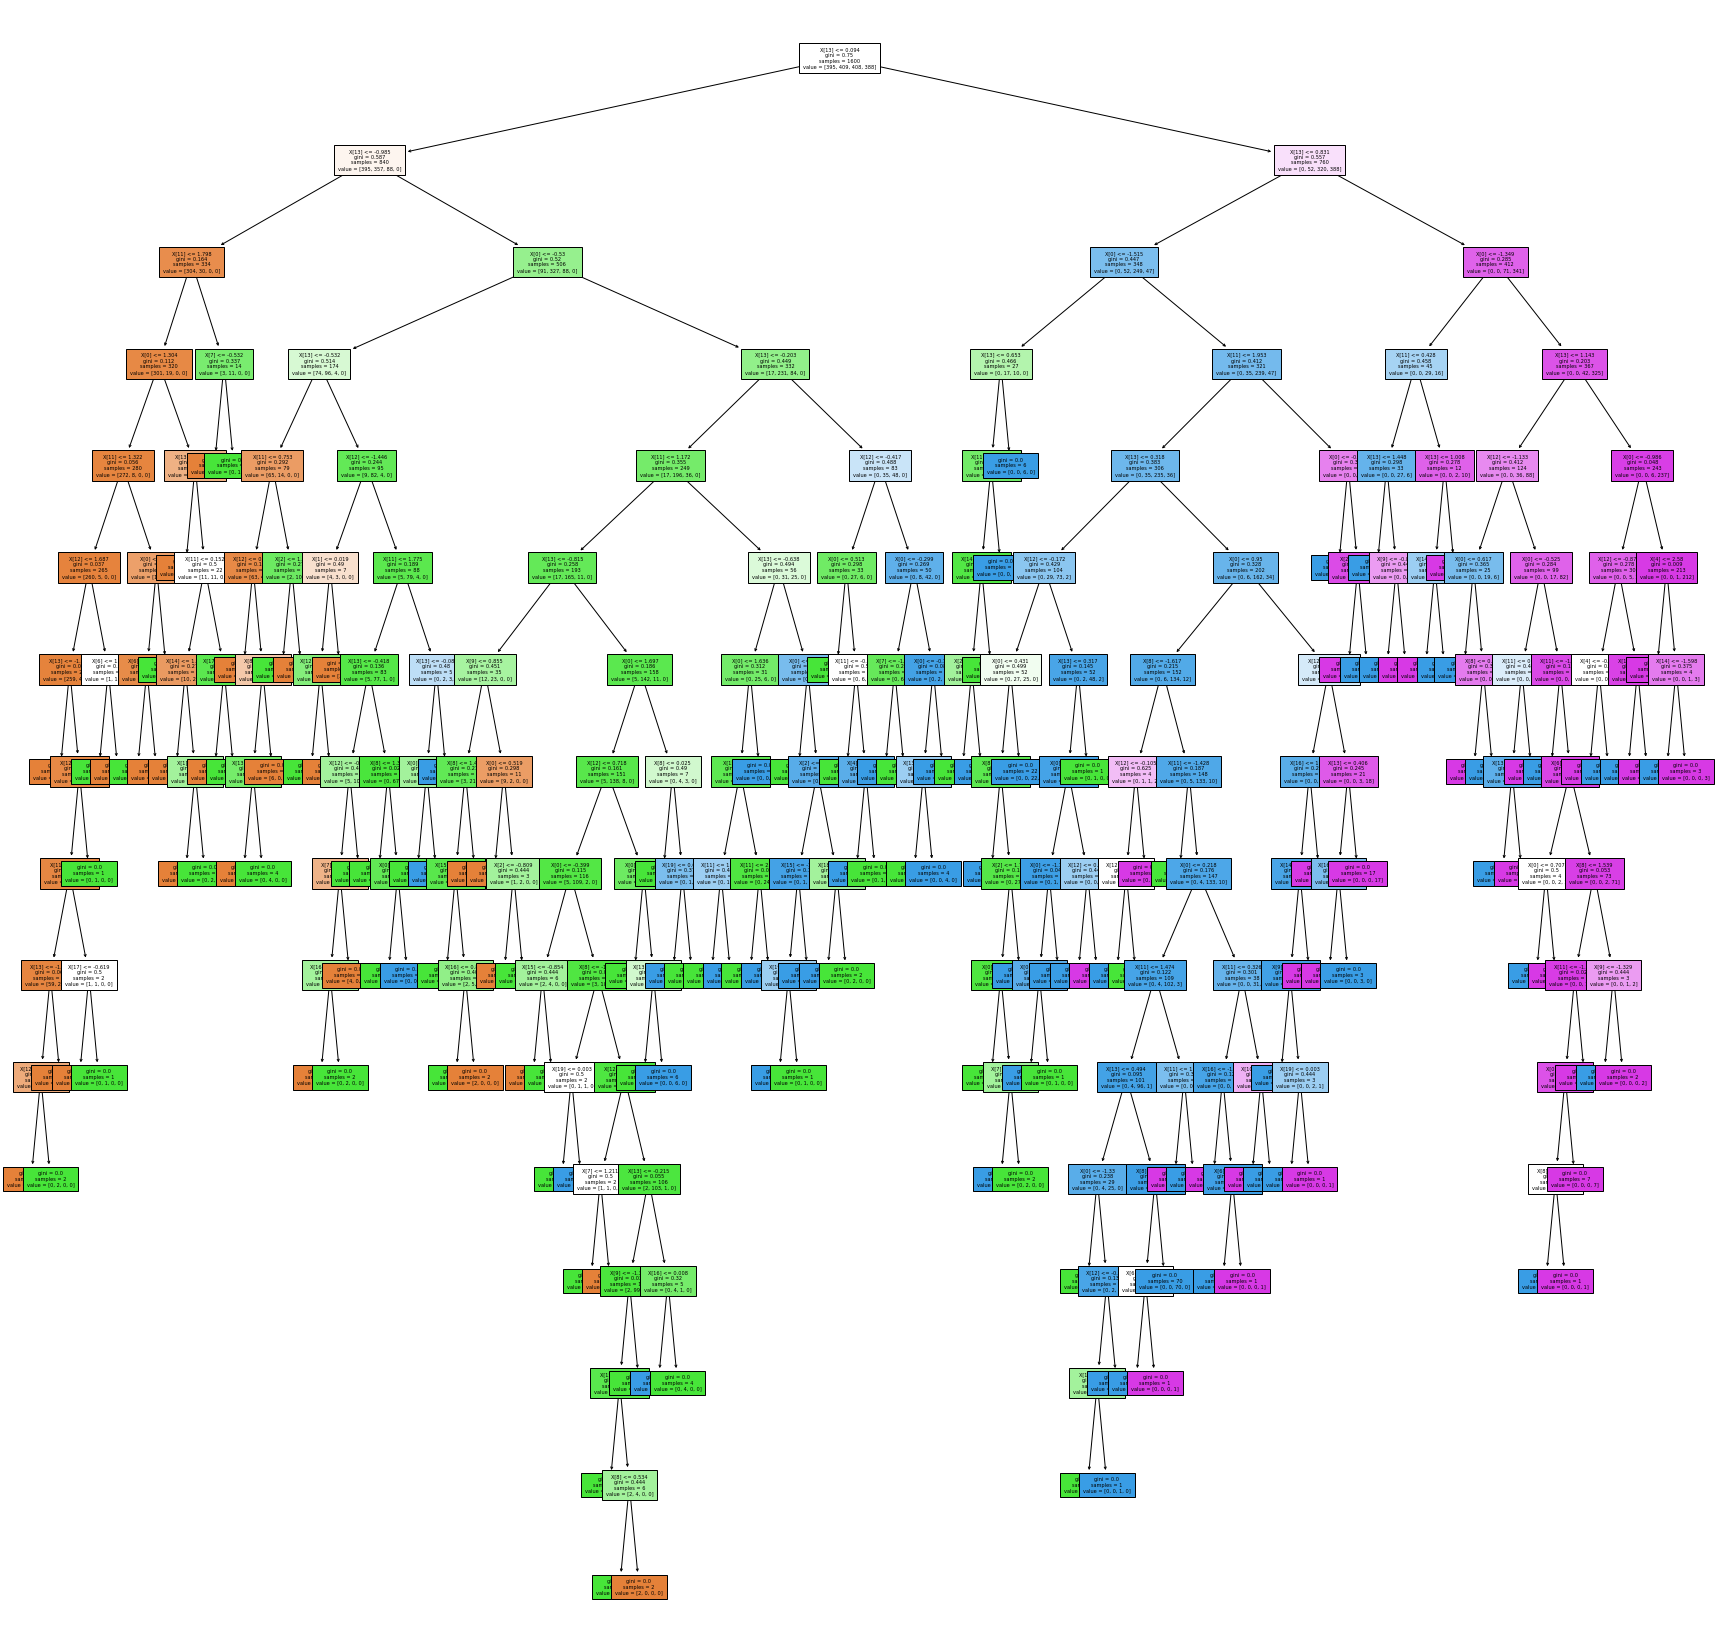

In [111]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

plt.figure(figsize=(30,30))
tree.plot_tree(clf, filled=True, fontsize=5)
plt.show()

# **Backward Selection**

In [66]:
def backward_selection(X, y):
  features = X.columns
  final_features = {'features': [], 'scores': []}
  rem_features = X.columns
  for i in range(len(X.columns)):
    max_score = 0
    worst_feature = ""
    worst_score = 0
    for feature in rem_features:
      new_X = X[features.drop(feature)]
      X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2, random_state=0)
      lr = LogisticRegression()
      lr.fit(X_train, y_train)
      score = lr.score(X_test, y_test)
      if score > max_score :
        max_score = score
        worst_feature = feature
        worst_score = score
    rem_features = rem_features.drop(worst_feature)
    features.drop(worst_feature)

    final_features['features'].append(worst_feature)
    final_features['scores'].append(worst_score)
  final_features['features_rank'] = range(len(X.columns))

  
  return final_features

In [67]:
from sklearn.preprocessing import StandardScaler

X = df_train.drop(['price_range'], axis=1)
y = df_train['price_range']

sc = StandardScaler()
X[X.columns] = sc.fit_transform(X[X.columns])

In [68]:
bs = backward_selection(X, y)

In [69]:
X = df_train.drop(['price_range'], axis=1)
y = df_train['price_range']

best_features = []
for i in bs['features'][13:]:
  best_features.append(i.strip())
X = X[best_features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [70]:
logisticReg = LogisticRegression()
logisticReg.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [71]:
y_pred = logisticReg.predict(X_test)

lr_conf_matrix = confusion_matrix(y_test, y_pred)
lr_acc_score = accuracy_score(y_test, y_pred)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test, y_pred))

confussion matrix
[[164  23]
 [  8 205]]
-------------------------------------------
Accuracy of Logistic Regression: 92.25 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       187
           1       0.90      0.96      0.93       213

    accuracy                           0.92       400
   macro avg       0.93      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400

